# Seleznev et al. (2006), Figures 3, 4, 6, 7, and 8

Reproduced by Dieter Werthmüller ([@prisae](https://github.com/prisae)).

> **Seleznev, N., T. Habashy, A. Boyd, and M. Hizem, 2006**  
> Formation properties derived from a multi-frequency dielectric measurement.  
> SPWLA 47th Annual Logging Symposium; Document ID: [SPWLA-2006-VVV](https://www.onepetro.org/conference-paper/SPWLA-2006-VVV).

### Requirements
- `NumPy`
- `IPython`
- `Jupyter`
- `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import diemmod

In [2]:
# Plot-style adjustments
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300

## Figure 3 - Klein and Swift

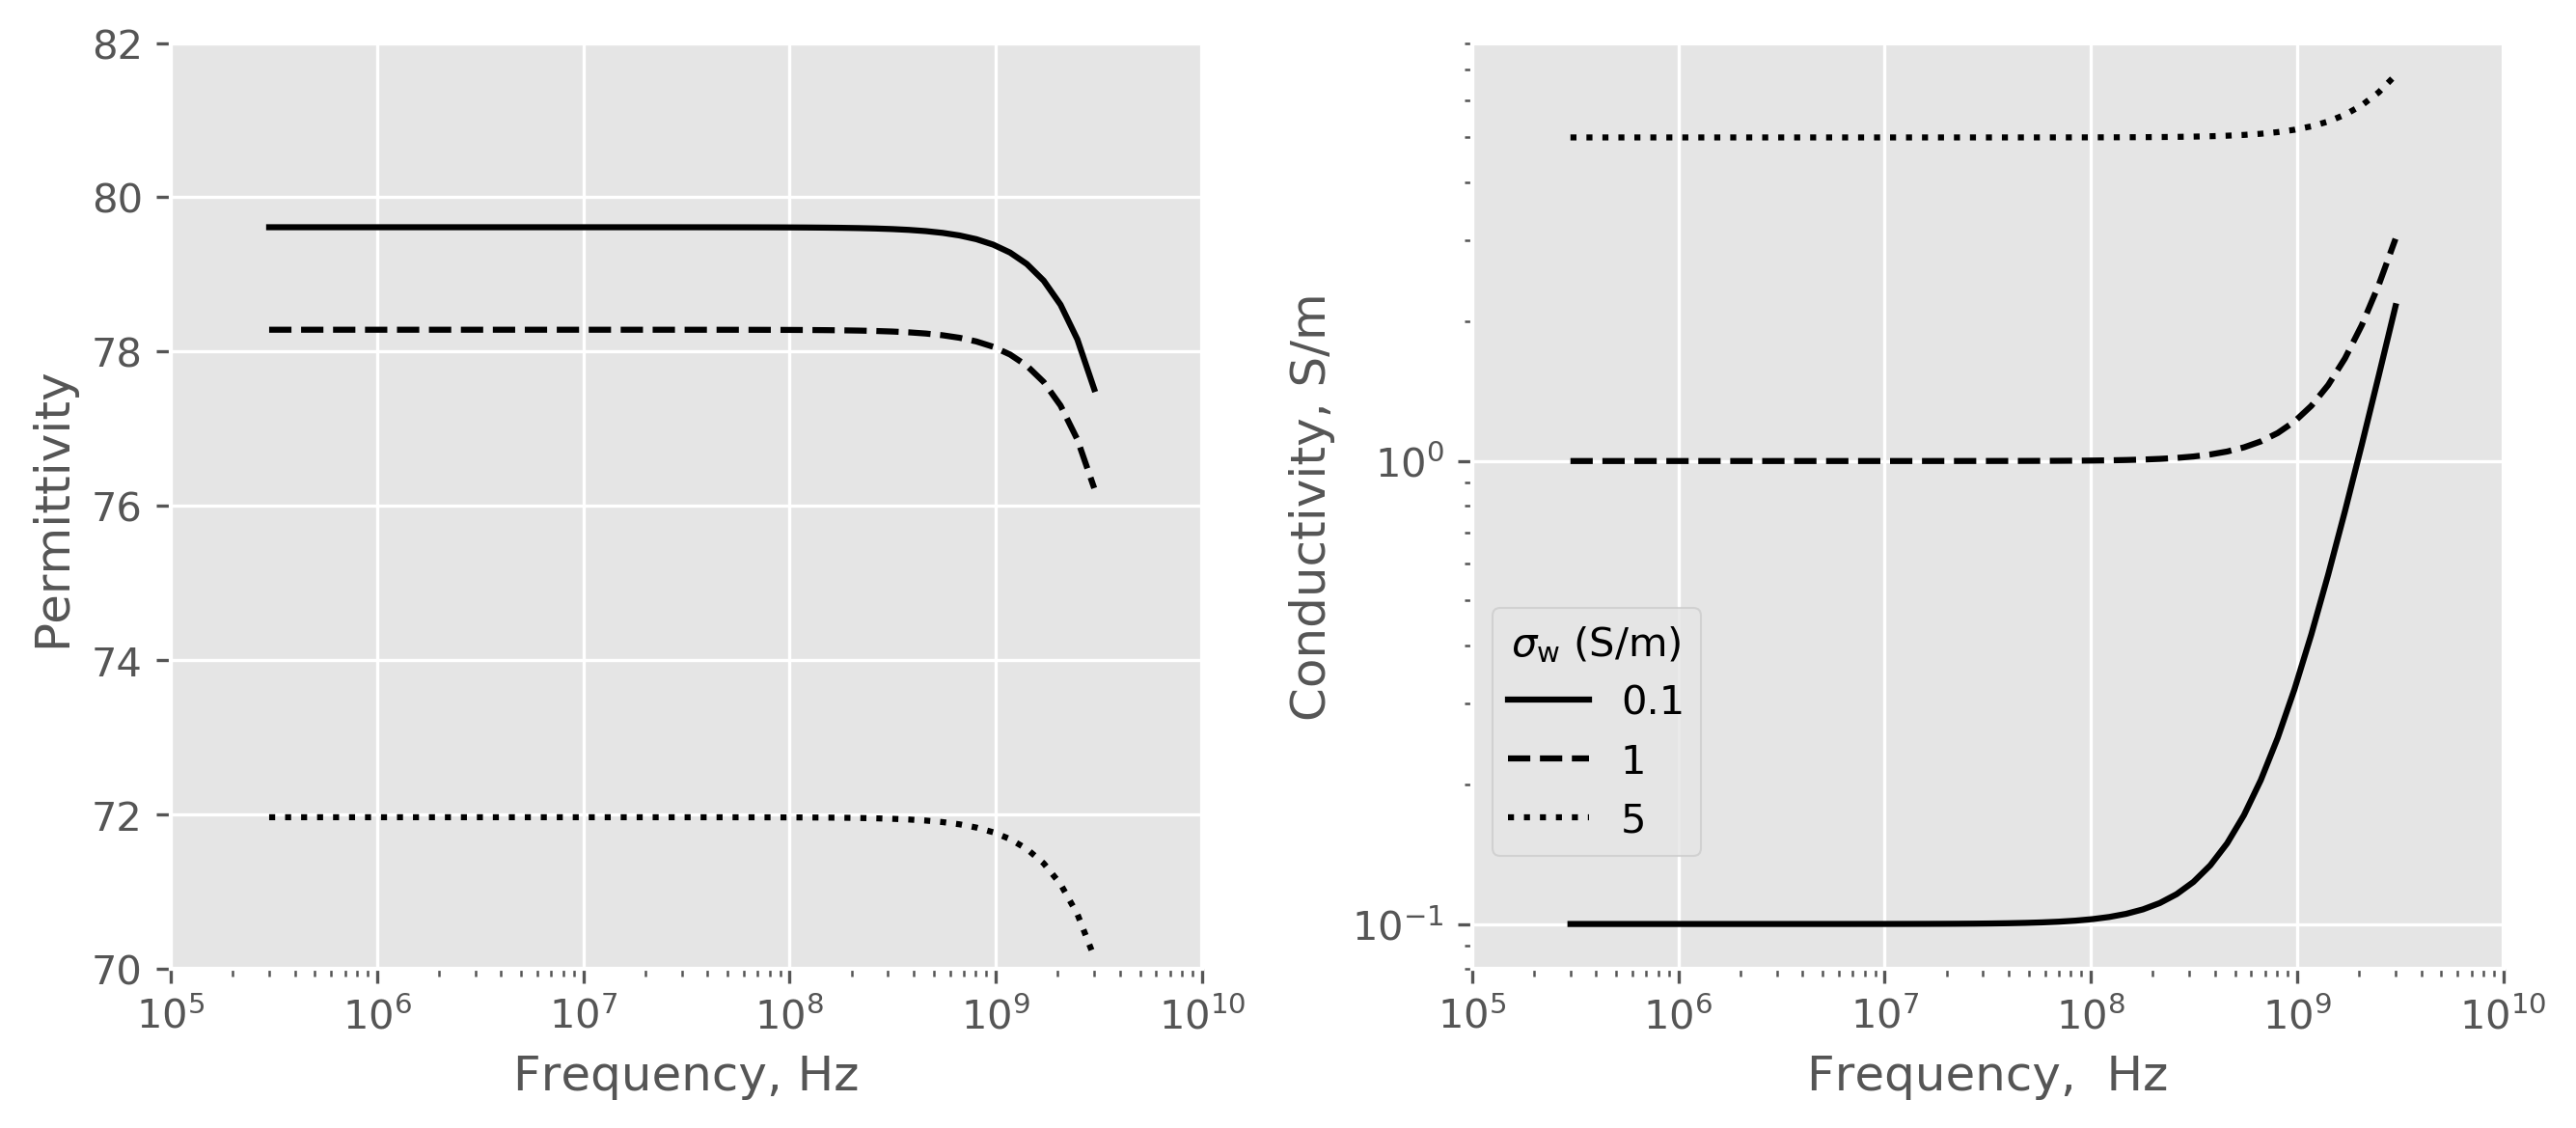

In [3]:
# Frequency range
f = np.logspace(np.log10(3e5), np.log10(3e9))

# Calculate the three models, using Crain to get salinity
eperm1 = diemmod.eps_w_klsw(f, 21, diemmod.sal_res_crain, 10)
eperm2 = diemmod.eps_w_klsw(f, 21, diemmod.sal_res_crain, 1)
eperm3 = diemmod.eps_w_klsw(f, 21, diemmod.sal_res_crain, .2)

# Create figure
plt.figure(figsize=(9, 4))

# Plot dielectric permittivity
plt.subplot(121)
plt.semilogx(f, eperm1.real, 'k')
plt.semilogx(f, eperm2.real, 'k--')
plt.semilogx(f, eperm3.real, 'k:')
plt.xlabel('Frequency, Hz')
plt.ylabel('Permittivity')
plt.axis([1e5, 1e10, 70, 82])

# Plot dielectric conductivity
ax = plt.subplot(122)
plt.loglog(f, -2*np.pi*f*diemmod.epsilon_0*eperm1.imag, 'k', label='0.1')
plt.loglog(f, -2*np.pi*f*diemmod.epsilon_0*eperm2.imag, 'k--', label='1')
plt.loglog(f, -2*np.pi*f*diemmod.epsilon_0*eperm3.imag, 'k:', label='5')
plt.legend(title=r'$\sigma_{\rm{w}}$ (S/m)', loc=3, bbox_to_anchor=(0, 0.1))
plt.xlabel('Frequency,  Hz')
plt.ylabel('Conductivity, S/m')
plt.axis([1e5, 1e10, .08, 8])

plt.tight_layout()
plt.show()

**Fig. 3** The permittivity and conductivity calculated with the Klein-Swift dispersion model for four different brine conductivities and a temperature of 21 ° C.

### Figure 3 - Original
![title](Figure3.jpg)


## Figure 4 - CRIM

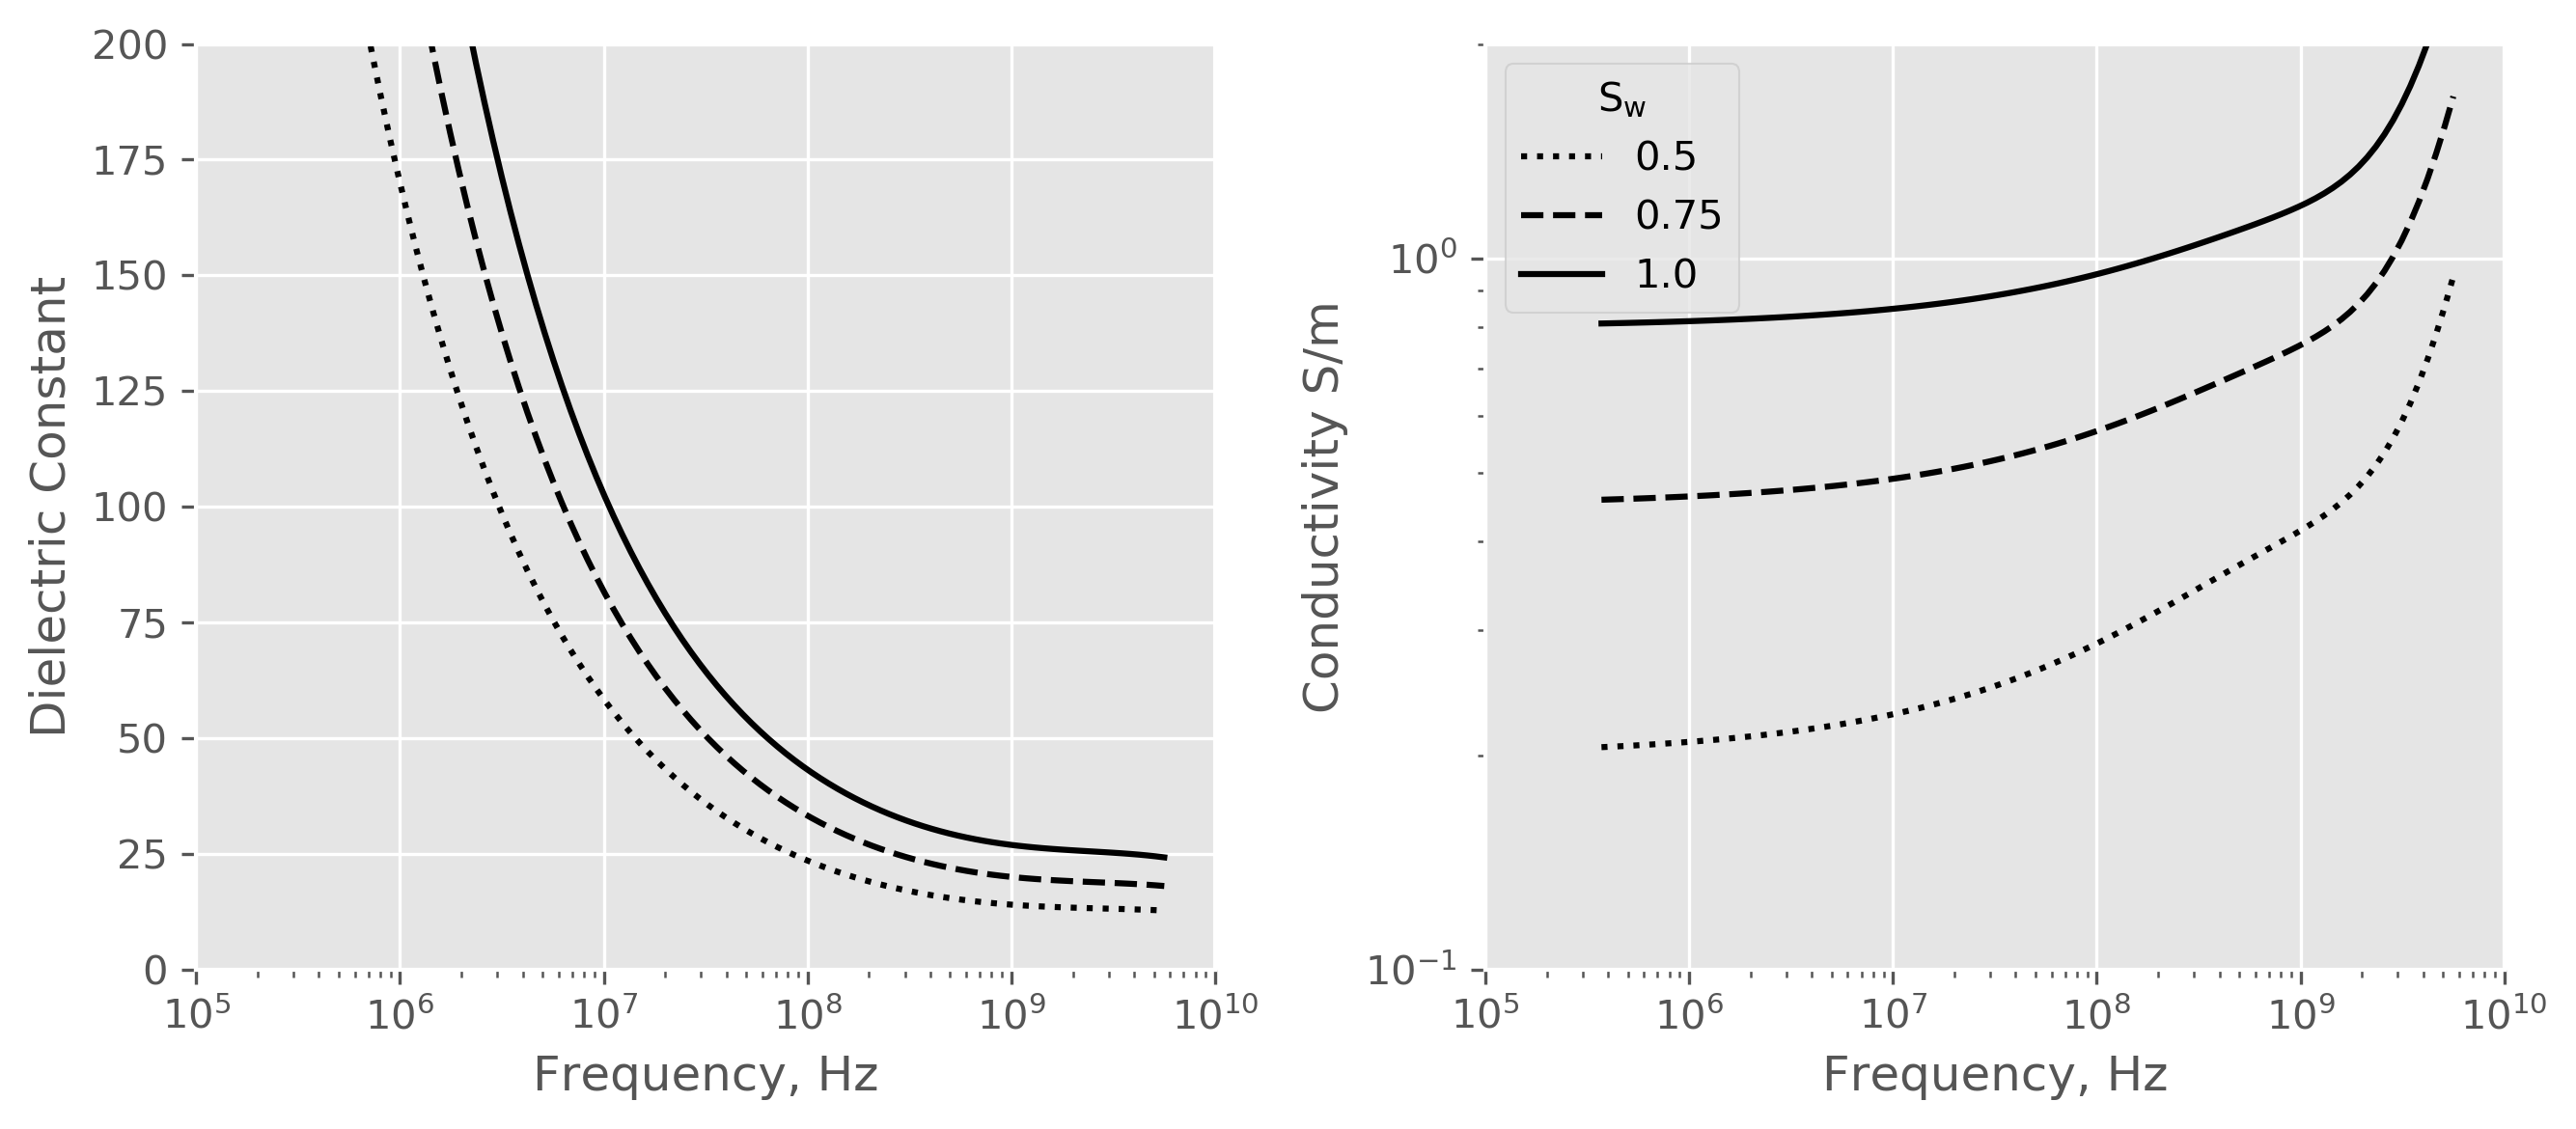

In [4]:
# Frequencies
f = np.logspace(5.57, 9.75, 100)

# Temperature
T = 21

# water resistivity
wat_res = 1/5

# Electric permittivities
e_oil = 2
e_mat = 7.5
e_wat = diemmod.eps_w_klsw(f, T, diemmod.sal_res_crain, wat_res)

# Porosity
por = 0.4


# Effective permittivity
e1 = diemmod.eperm_crim(por, e_mat, e_wat, e_oil, .5)
e2 = diemmod.eperm_crim(por, e_mat, e_wat, e_oil, .75)
e3 = diemmod.eperm_crim(por, e_mat, e_wat, e_oil, 1)


plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.semilogx(f, e1.real, 'k:')
plt.semilogx(f, e2.real, 'k--')
plt.semilogx(f, e3.real, 'k-')
plt.xlabel('Frequency, Hz')
plt.ylabel('Dielectric Constant')
plt.axis([1e5, 1e10, 0, 200])

ax = plt.subplot(122)
plt.loglog(f, -2*np.pi*f*diemmod.epsilon_0*e1.imag, 'k:', label='0.5')
plt.loglog(f, -2*np.pi*f*diemmod.epsilon_0*e2.imag, 'k--', label='0.75')
plt.loglog(f, -2*np.pi*f*diemmod.epsilon_0*e3.imag, 'k-', label='1.0')
plt.legend(title=r'S$_{\rm{w}}$')
plt.xlabel('Frequency, Hz')
plt.ylabel('Conductivity S/m')
plt.axis([1e5, 1e10, 0.1, 2])

plt.tight_layout()
plt.show()

**Fig. 4** The permittivity and conductivity dispersion curves calculated with the CRI law for a limestone with
40% porosity at several partial saturations. The rock is partially saturated with 5 S/m brine and hydrocarbons.
The matrix permittivity is 7.5, and the hydrocarbon permittivity is 2.

### Figure 4 - Original
![title](Figure4.jpg)

## Figure 6 - Two phase with textural model

In [5]:
# Frequencies, porosity, temperature
freq = np.logspace(np.log10(5e7), np.log10(3e9), 101)
por = 0.3
T = 21

# water resistivity and electric permittivities
wat_res = 1/5.0
e_mat = 7.5
e_wat = diemmod.eps_w_klsw(freq, T, diemmod.sal_res_crain, wat_res)

# Effective permittivity
eeff100 = diemmod.eperm_maga(por, e_mat, e_wat, [100, 100, 10, 10])
eeff10 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 10, 10])
eeff5 = diemmod.eperm_maga(por, e_mat, e_wat, [5, 5, 10, 10])
eeff1 = diemmod.eperm_maga(por, e_mat, e_wat, [1, 1, 10, 10])

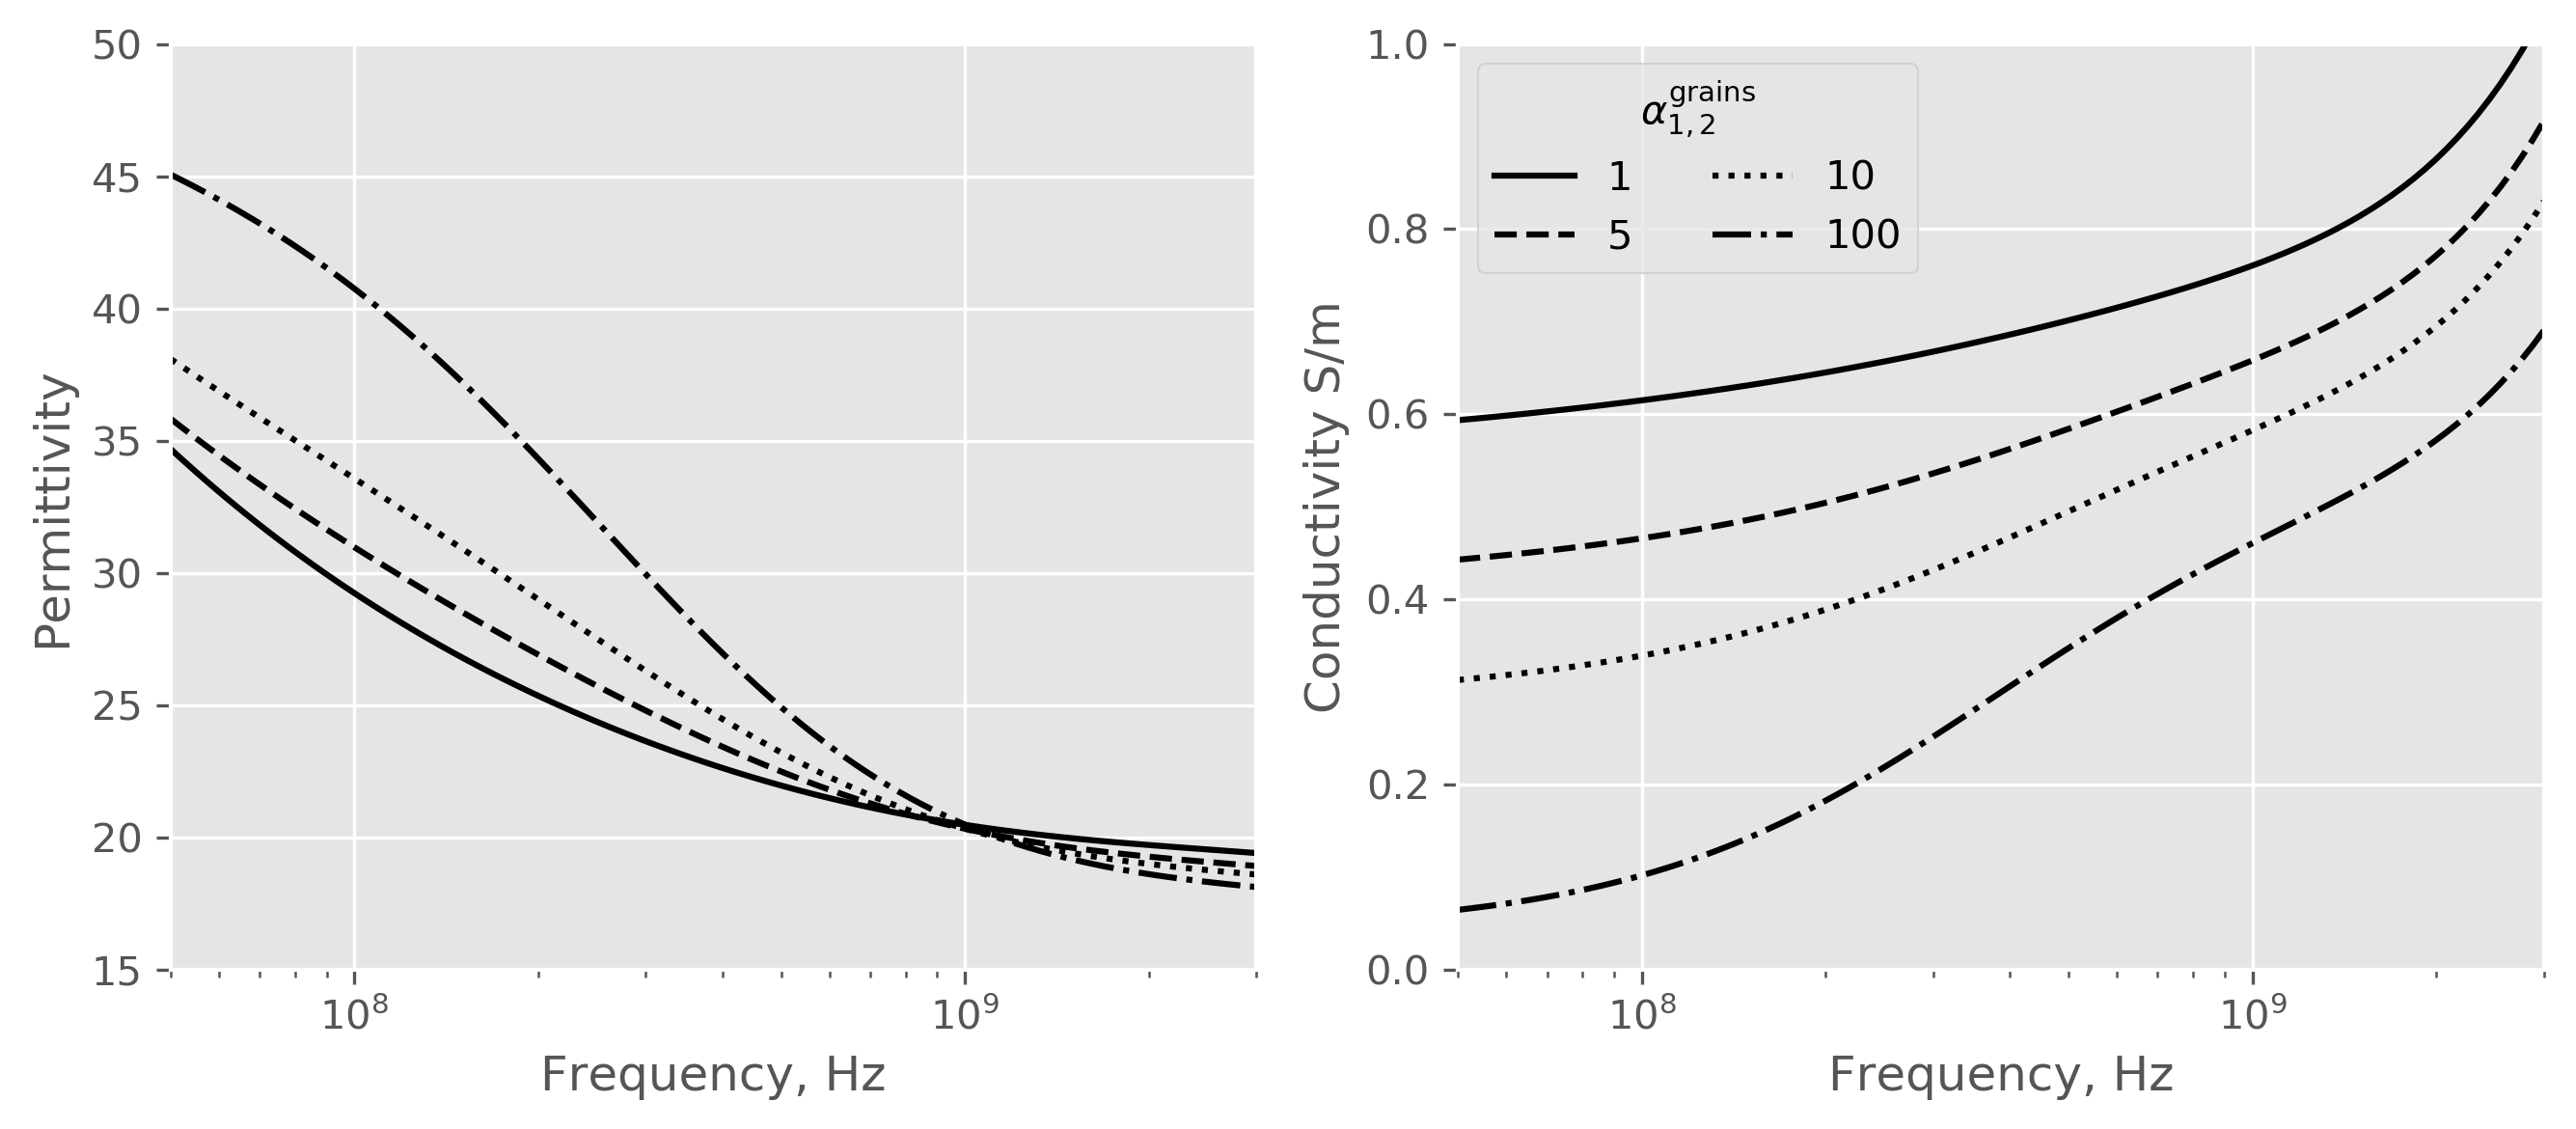

In [6]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.semilogx(freq, eeff1.real, 'k-')
plt.semilogx(freq, eeff5.real, 'k--')
plt.semilogx(freq, eeff10.real, 'k:')
plt.semilogx(freq, eeff100.real, 'k-.')
plt.xlabel('Frequency, Hz')
plt.ylabel('Permittivity')
plt.axis([5e7, 3e9, 15, 50])

ax = plt.subplot(122)
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff1.imag, 'k-', label='1')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff5.imag, 'k--', label='5')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff10.imag, 'k:', label='10')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff100.imag, 'k-.', label='100')
plt.legend(title=r'$\alpha^{\rm{grains}}_{1,2}$', ncol=2)
plt.xlabel('Frequency, Hz')
plt.ylabel('Conductivity S/m')
plt.axis([5e7, 3e9, 0, 1])

plt.tight_layout()
plt.show()

**Fig. 6** The permittivity and conductivity of a two-phase mixture computed with the textural model. Pores have an aspect ratio of 10 while the aspect ratio of the grains is varied from 1 to 100. The rock porosity is 30%, and it is fully saturated with 5 S/m brine. Flatter grains decrease the mixture conductivity and simultaneously enhance permittivity towards lower frequencies.

### Figure 6 - Original
![title](Figure6.jpg)


## Figure 7 - Two phase with textural model

In [7]:
# Frequencies, porosity, temperature
freq = np.logspace(np.log10(5e7), np.log10(3e9), 101)
por = 0.4
T = 21

# water resistivity and electric permittivities
wat_res = 1/5.0
e_mat = 7.5
e_wat = diemmod.eps_w_klsw(freq, T, diemmod.sal_res_crain, wat_res)

# Effective permittivity
eeff100 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 100, 100])
eeff10 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 10, 10])
eeff5 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 5, 5])
eeff1 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 1, 1])

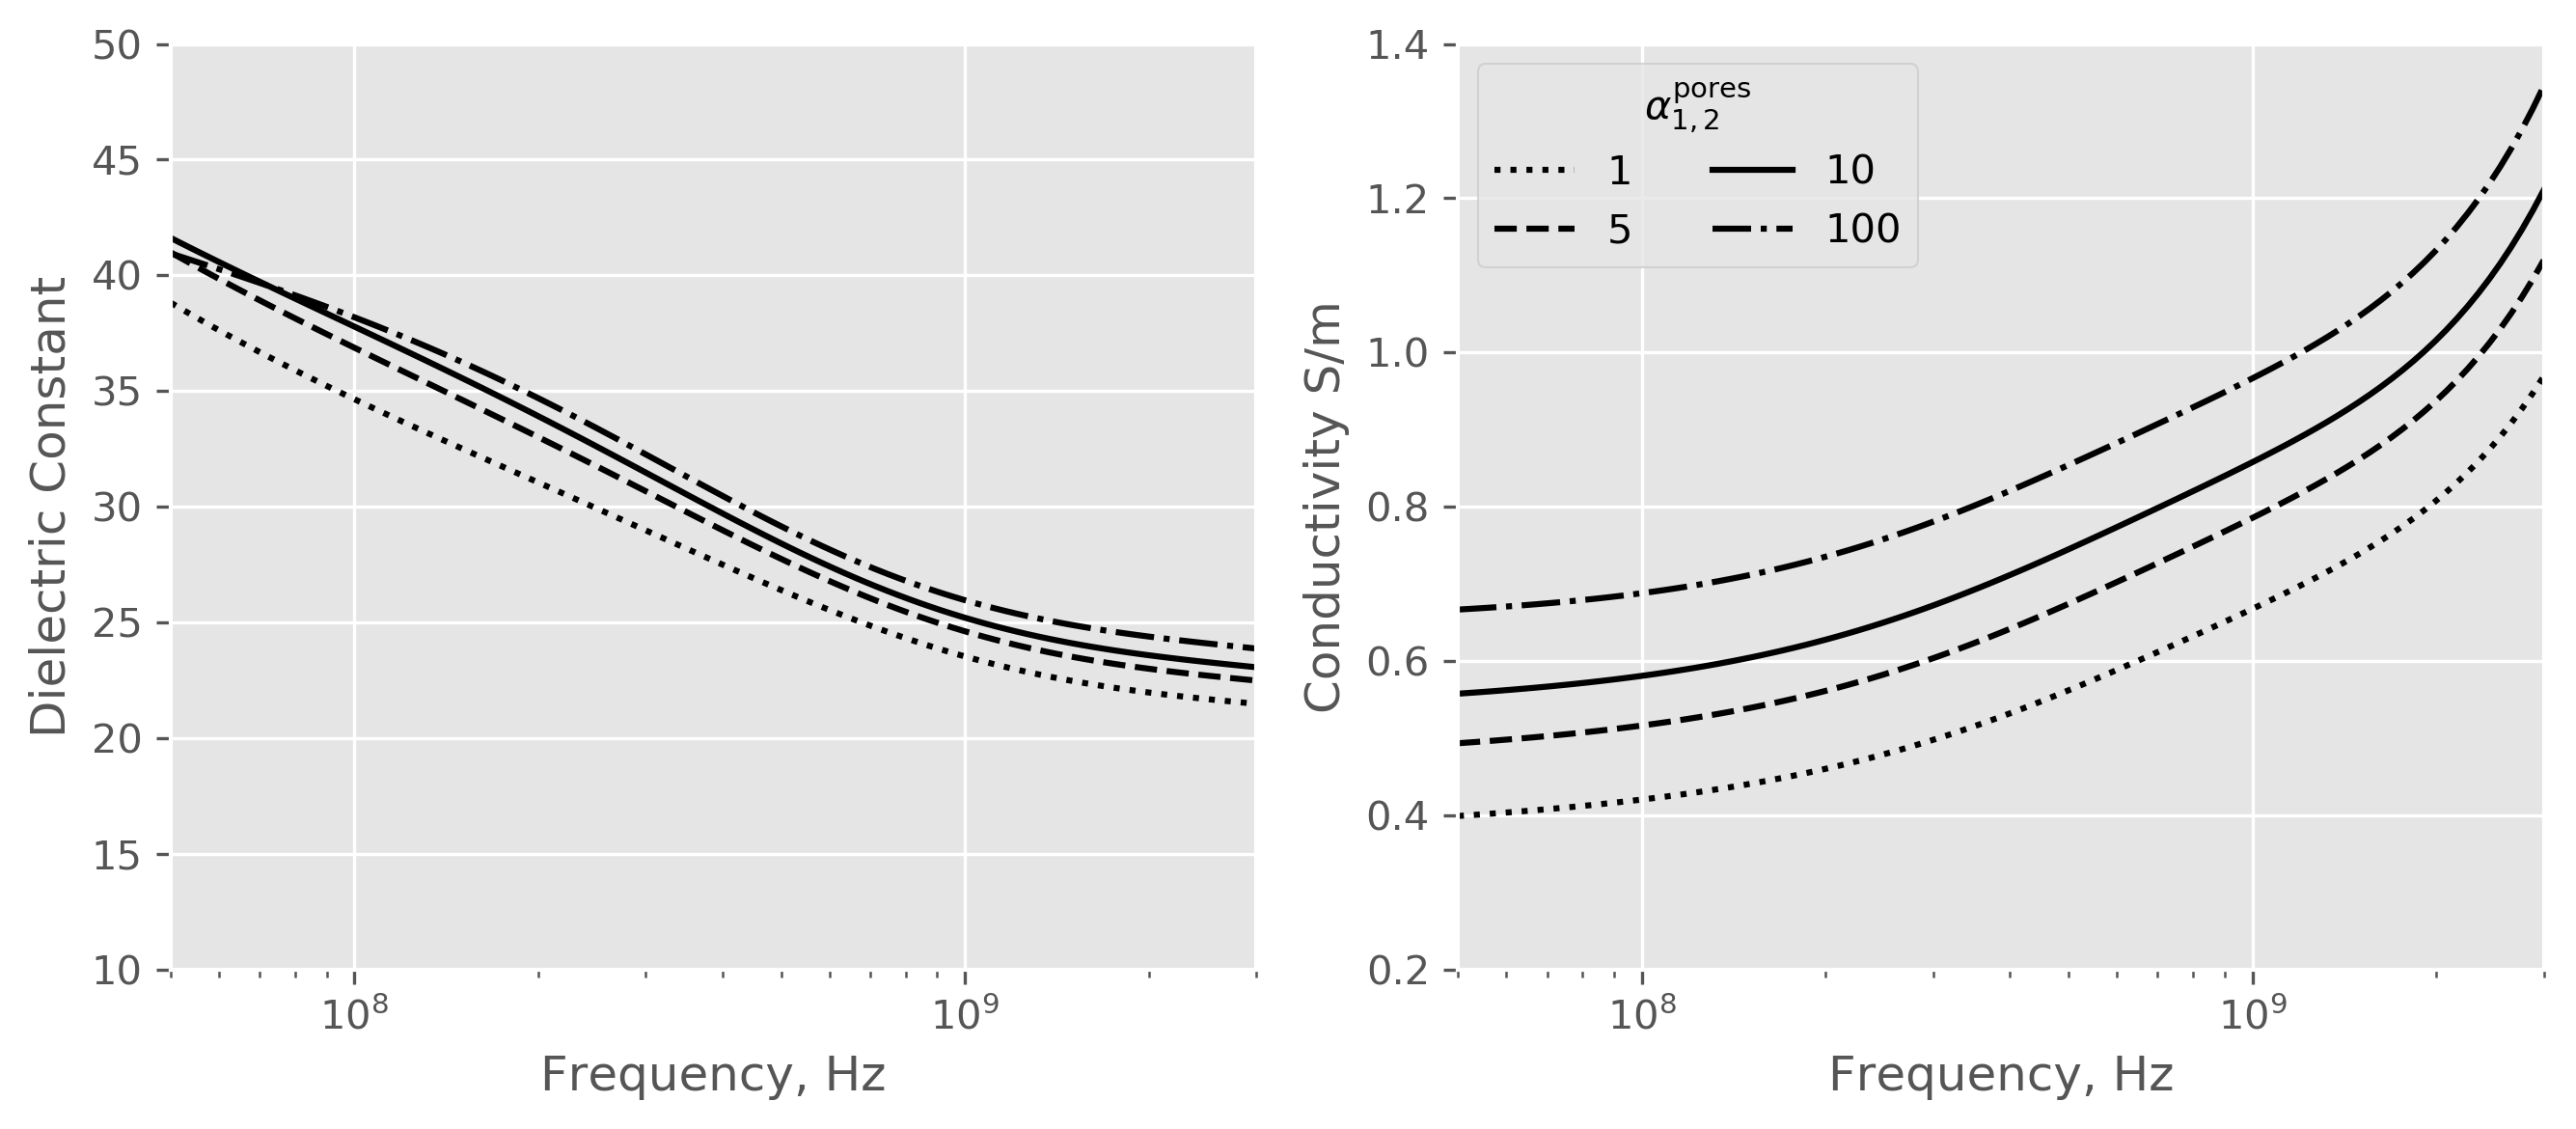

In [8]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.semilogx(freq, eeff1.real, 'k:')
plt.semilogx(freq, eeff5.real, 'k--')
plt.semilogx(freq, eeff10.real, 'k-')
plt.semilogx(freq, eeff100.real, 'k-.')
plt.xlabel('Frequency, Hz')
plt.ylabel('Dielectric Constant')
plt.axis([5e7, 3e9, 10, 50])

ax = plt.subplot(122)
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff1.imag, 'k:', label='1')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff5.imag, 'k--', label='5')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff10.imag, 'k-', label='10')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff100.imag, 'k-.', label='100')
plt.legend(title=r'$\alpha^{\rm{pores}}_{1,2}$', ncol=2)
plt.xlabel('Frequency, Hz')
plt.ylabel('Conductivity S/m')
plt.axis([5e7, 3e9, 0.2, 1.4])

plt.tight_layout()
plt.show()

**Fig. 7** The permittivity and conductivity of a two-phase mixture computed with the textural model. The aspect ratio of grains is fixed at 10 while the aspect ratio of pores is varied from 1 to 100. Flatter pores increase the conductivity of the mixture.

### Figure 7 - Original
![title](Figure7.jpg)

## Figure 8; three-phase mixture

In [9]:
# Frequencies, porosity, temperature
freq = np.logspace(np.log10(5e7), np.log10(3e9), 101)
por = 0.3
T = 21

# water resistivity and electric permittivities
wat_res = 1/5.0
e_oil = 2
e_mat = 7.5
e_wat = diemmod.eps_w_klsw(freq, T, diemmod.sal_res_crain, wat_res)

# Effective permittivity
eeff25 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 10, 10, 1, 1], e_oil, 0.25)
eeff50 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 10, 10, 1, 1], e_oil, 0.5)
eeff75 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 10, 10, 1, 1], e_oil, 0.75)
eeff100 = diemmod.eperm_maga(por, e_mat, e_wat, [10, 10, 10, 10, 1, 1], e_oil, 1)

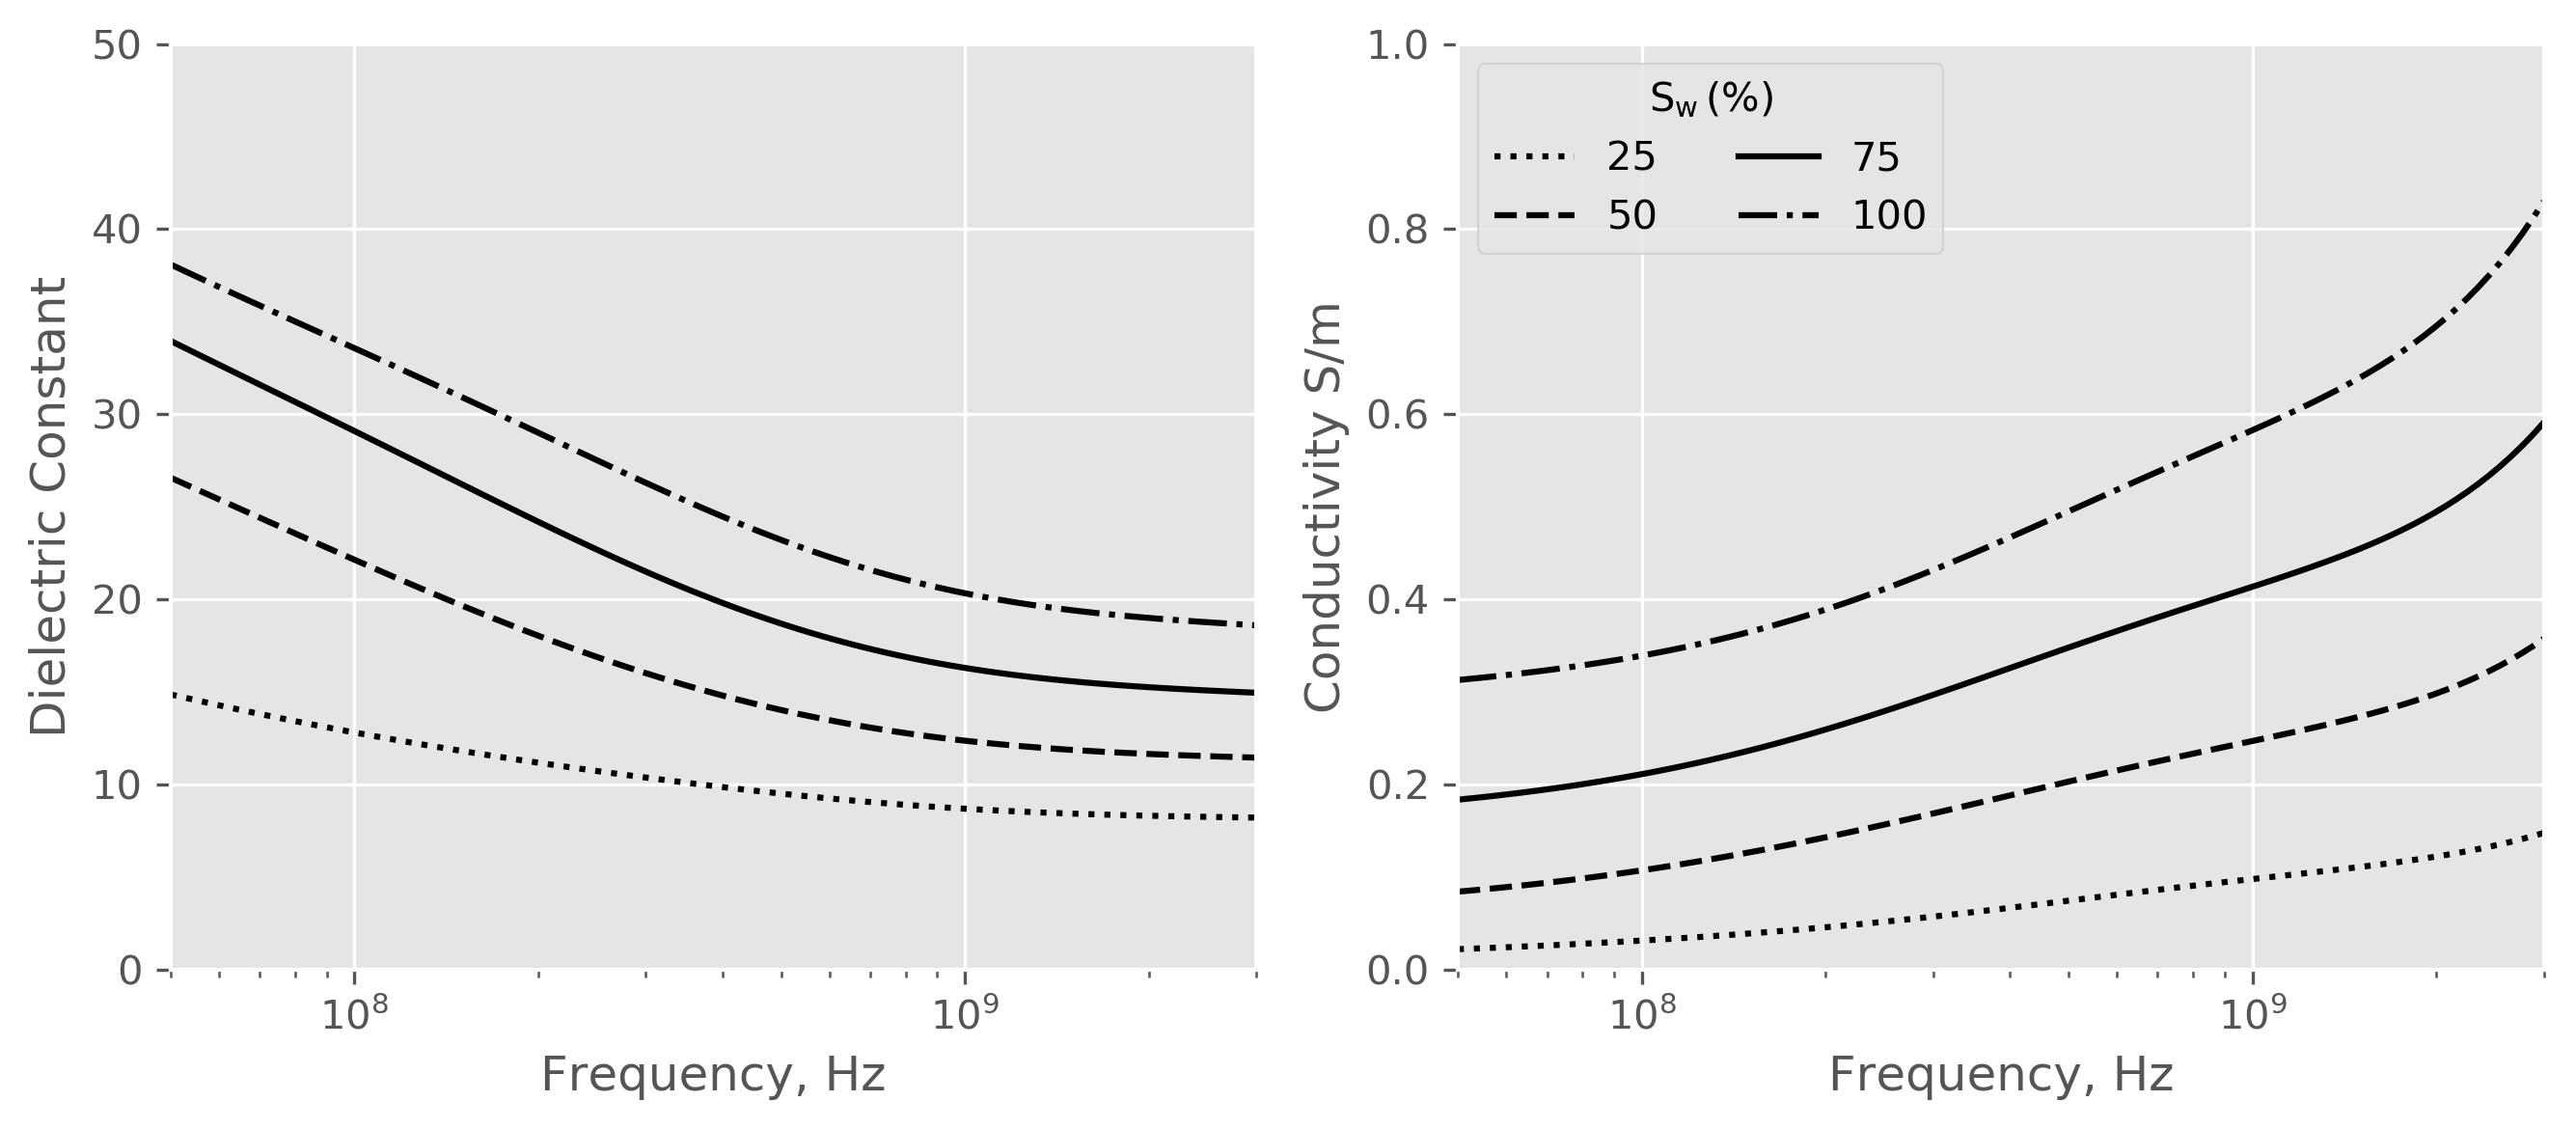

In [10]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.semilogx(freq, eeff25.real, 'k:')
plt.semilogx(freq, eeff50.real, 'k--')
plt.semilogx(freq, eeff75.real, 'k-')
plt.semilogx(freq, eeff100.real, 'k-.')
plt.xlabel('Frequency, Hz')
plt.ylabel('Dielectric Constant')
plt.axis([5e7, 3e9, 0, 50])

ax = plt.subplot(122)
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff25.imag, 'k:', label='25')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff50.imag, 'k--', label='50')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff75.imag, 'k-', label='75')
plt.semilogx(freq, -2*np.pi*freq*diemmod.epsilon_0*eeff100.imag, 'k-.', label='100')
plt.legend(title=r'S$_{\rm{w}}\,(\%)$', ncol=2)
plt.xlabel('Frequency, Hz')
plt.ylabel('Conductivity S/m')
plt.axis([5e7, 3e9, 0, 1])

plt.tight_layout()
plt.show()

**Fig. 8** The permittivity and conductivity of a three-phase mixture computed with the textural model. Pores and grains are oblate spheroids with an aspect ratio of 10, while the oil inclusions are spherical. The rock porosity is 30%, and the brine conductivity is 5 S/m. A reduction in water saturation leads to a smaller dielectric constant and conductivity.

### Figure 8 - Original
![title](Figure8.jpg)